# Word2Vec-Movie Review

In this project, we will use Word2Vec to create word embeddings for reviews in our dataset. We will be using various functions of Word2Vec to show correlation between different inputs. Word2vec takes as its input a large corpus of text and produces a vector space, typically of several hundred dimensions, with each unique word in the corpus being assigned a corresponding vector in the space. Word vectors are positioned in the vector space such that words that share common contexts in the corpus are located in close proximity to one another in the space. Algorithms like n-grams are used to recognize the context in which a word comes. The algorithm chunks out group of n words from the sentence and then it tries to predict the neighbourhood words of the word under consideration. 

More details on Word2Vec can be found here: https://en.wikipedia.org/wiki/Word2vec

After creating word embeddings, we will visualize the correlations using t-SNE. It is a nonlinear dimensionality reduction technique that is particularly well-suited for embedding high-dimensional data into a space of two or three dimensions, which can then be visualized in a scatter plot. T-SNE library is used to squash the vectors into 2-D plots

The first step is to preprocess our raw text data to make it useable by Word2Vec.

The dependencies we will be needing are:
1. numpy- for handling multidimensional arrays and scientific calculations
2. pandas- for data manipulation and handling in a structured manner
3. BeautifulSoup- to remove all the html markups in review text
4. re- regular expression to remove everything except alphabets
5. nltk- natural language toolkit used in removing stopwords
6. word2vec- to create word embeddings
7. TSNE- dimentionality reduction or word embeddings
8. matplotlib- to show the plots

In [2]:
import numpy as np
import pandas as pd
from bs4 import BeautifulSoup
import re
from nltk.corpus import stopwords
from gensim.models import word2vec
from sklearn.manifold import TSNE
from matplotlib import pyplot as plt

Read data from file using pandas

In [4]:
data = pd.read_csv('/Users/kr_subham/Desktop/Word2Vec/labeledTrainData.tsv', delimiter='\t')
data.head()

,id,sentiment,review
0,5814_8,1,With all this stuff going down at the moment w...
1,2381_9,1,"\The Classic War of the Worlds\"" by Timothy Hi..."
2,7759_3,0,The film starts with a manager (Nicholas Bell)...
3,3630_4,0,It must be assumed that those who praised this...
4,9495_8,1,Superbly trashy and wondrously unpretentious 8...


The column 'id' in the data is not useful to us. Hence, removing it

In [5]:
data.drop('id', axis=1, inplace=True)
data.head()

,sentiment,review
0,1,With all this stuff going down at the moment w...
1,1,"\The Classic War of the Worlds\"" by Timothy Hi..."
2,0,The film starts with a manager (Nicholas Bell)...
3,0,It must be assumed that those who praised this...
4,1,Superbly trashy and wondrously unpretentious 8...


The next step is to clean the reviews. This is done as follows:
1. The html markups are removed first from the text
2. Then all the punctuation marks and numbers are replaced by a blank space so that only text data remains
3. The text data is converted to lowercase
4. The lowercase sentences are tokenized into individual words
5. The stopwords are removed from the tokenized sentences so that only meaningful words remain

The list review_clean contains the cleaned-up reviews in tokenize form.

In [6]:
review_clean = []
stops = set(stopwords.words('english'))
def clean_review(raw_input):
    no_markups = BeautifulSoup(raw_input, 'html5lib')
    text = no_markups.get_text()
    only_text = re.sub('[^a-zA-Z]', ' ', text)
    lower_text = only_text.lower()
    tokens = lower_text.split()
    words = [w for w in tokens if not w in stops]
    return words

for i in data['review']:
    review_clean.append(clean_review(i))

A part of review after cleaning is shown below

In [7]:
review_clean[19][:5]

['people', 'especially', 'young', 'people', 'may']

Now since the review_clean list contains clean data, we can train our Word2Vec model. We will be keeping minimum word count to be 1. Also, the size of word embeddings is set to 400 and workers is set to 4 to use 4 CPU cores simultaneously. This will increase the speed of training and will create the word embeddings faster.

In [19]:
model = word2vec.Word2Vec(review_clean, min_count=1, size=400, workers=4)
model

The above message shows that the model is successfuly created. We can now use several function to see how it is working.

In [46]:
print(model.wv['happy'][:50])
print('Shape: ', model.wv['happy'].shape)

[ 0.43039581 -0.5268746   0.33743325  0.09726456 -0.40471464 -0.02770166
 -0.24940562 -0.09030296 -0.05066823  0.71220857  0.5879218  -0.40466875
  0.56911522  0.01513779 -0.68414742 -0.07438909 -0.15969133  0.42162883
 -0.28290892 -0.21183842 -0.78645235 -0.4217014   0.16568239 -0.77605593
 -0.21308294 -0.22118215  0.01070904 -0.65946114 -0.66816795  0.24633329
  0.44516987 -0.05861262 -0.24660432 -0.47416157 -0.36608914  0.15652552
 -0.34958261 -0.26594257 -0.79872036 -0.49102822  0.76905131  0.13032548
  0.33894154  0.63793153  0.28246641 -0.81712025  0.14592674  0.8808459
 -0.33327132  0.21700852]
Shape:  (400,)


The model created word embeddings of size 400 for each word of every sentence in review_clean. The first 50 embeddings of the word 'happy' created by model is shown above. Similar to this, every word has a unique embedding of dimension (400,) with similar words closer and opposite words far apart

In [22]:
 model.wv.most_similar('happy')

[('afraid', 0.7350729703903198),
 ('tears', 0.733421802520752),
 ('sad', 0.72188401222229),
 ('cry', 0.718899130821228),
 ('wanting', 0.6852778792381287),
 ('ruin', 0.6843205094337463),
 ('lose', 0.6676592826843262),
 ('touched', 0.6555779576301575),
 ('radiohead', 0.6530681848526001),
 ('spoil', 0.6517599821090698)]

In [23]:
 model.wv.most_similar('interesting')

[('intriguing', 0.8139171600341797),
 ('unusual', 0.7225215435028076),
 ('exciting', 0.7086046934127808),
 ('surprising', 0.707027792930603),
 ('added', 0.7057640552520752),
 ('odd', 0.7048221826553345),
 ('worthwhile', 0.6977936029434204),
 ('compelling', 0.6888687610626221),
 ('fascinating', 0.6846849918365479),
 ('fit', 0.6802269816398621)]

In [26]:
model.wv.doesnt_match("breakfast cereal dinner lunch".split())

'cereal'

The model is working fairly fine even when it is trained on a small dataset.

Now we will make a function to plot the words similar to a given word using t-SNE. The vizualizations will help us observe the correlations more effectively. The working of each line in the function is commented in the code

In [41]:
def similar_words(model, word):
    
    arr = np.empty((0,400), dtype='f') #creates an empty array of size equalto the size of embeddings
    word_labels = [word] #initializes the word_labels list with the given word
    close_words = model.wv.similar_by_word(word) #a list of all the words similar to the given word
    
    arr = np.append(arr, np.array([model.wv[word]]), axis=0)
    for wrd_score in close_words: #for every word in close_words list
        wrd_vector = model.wv[wrd_score[0]] #this list stores the word embeddings of all the close_words
        word_labels.append(wrd_score[0]) #this list stores the labels of corresponding words stored
        arr = np.append(arr, np.array([wrd_vector]), axis=0) #each entry is appended into arr
        
    tsne = TSNE(n_components=2, random_state=0) #a 2 components t-SNE classifier is created
    Y = tsne.fit_transform(arr) #dimentionality is reduced for plotting
    x_coords = Y[:, 0] #x and y coordinates are separated
    y_coords = Y[:, 1] #in their respective lists
    plt.scatter(x_coords, y_coords) #a scatter plot is formed

    for label, x, y in zip(word_labels, x_coords, y_coords):
        plt.annotate(label, xy=(x, y), xytext=(0, 0), textcoords='offset points') #labels are also displayed alongwith the plot
    plt.xlim(x_coords.min()+0.00005, x_coords.max()+0.00005)
    plt.ylim(y_coords.min()+0.00005, y_coords.max()+0.00005)
    plt.show()

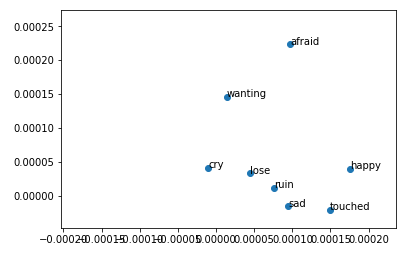

In [43]:
similar_words(model, 'happy')

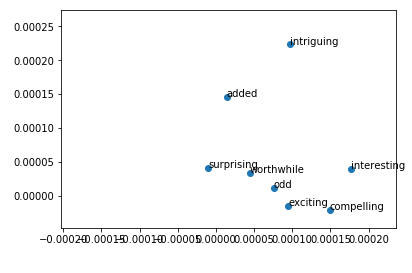

In [44]:
similar_words(model, 'interesting')

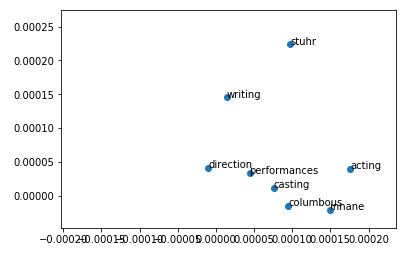

In [45]:
similar_words(model, 'acting')

Observing the above 3 plots, the model seems to work well. Word2Vec is used to create word embeddings and t-SNE alongwith matplotlib is used to plot and show the visualization

The word embeddings created using Word2Vec can be widely used in many applications such as Question-Answering machine, Text classification etc